In [57]:
import matplotlib.pyplot as plt 
import numpy as np 
import xarray as xr
import pandas as pd
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util
# import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings('ignore')


In [6]:
def cesm_correct_time(ds):
    """Given a Dataset, check for time_bnds,
       and use avg(time_bnds) to replace the time coordinate.
       Purpose is to center the timestamp on the averaging inverval.   
       NOTE: ds should have been loaded using `decode_times=False`
    """
    assert 'time_bnds' in ds
    assert 'time' in ds
    correct_time_values = ds['time_bnds'].mean(dim='nbnd')
    # copy any metadata:
    correct_time_values.attrs = ds['time'].attrs
    ds = ds.assign_coords({"time": correct_time_values})
    ds = xr.decode_cf(ds)  # decode to datetime objects
    return ds


In [294]:
# Get states outline for cartopy
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

In [332]:
'''
Function to map seasonal differences in different variables. 
Define variable choice to map out difference in as a string (varSel). 
Since we'd also like to denote clearly in the title what the difference is, pass in with diffString. 

Differences are taken as the test DS minus control, and seasonal averages
are assumed to have already been computed. 
'''
def map2d_SeasonalDifferences(ctlDS, testDS1, testDS2, varSel, diffString1, diffString2):
    # Get difference in variables and set cbar range 
    diffDS1 = testDS1 - ctlDS
    diffDS2 = testDS2 - ctlDS 
    
    # * Note: * Play around with coef on ranges to get a reasonable plot with enough detail 
    # Get ranges for differences 
    maxDiff = np.nanmax(diffDS1[varSel].values[:,:,:])
    minDiff = np.nanmin(diffDS1[varSel].values[:,:,:])
    valRange1 = 0.85*np.nanmax([np.abs(maxDiff),np.abs(minDiff)])
    
    maxDiff = np.nanmax(diffDS2[varSel].values[:,:,:])
    minDiff = np.nanmin(diffDS2[varSel].values[:,:,:])
    valRange2 = 0.85*np.nanmax([np.abs(maxDiff),np.abs(minDiff)])
#     valRange2 = 2.5  # Used to ensure consistent colorbars for TBOT and TS plots
    # * * * * * * * * * * * * * * * * * * * * * * * *  * * * * * * * * * * * *  * * * * * * * * * * * * 
    
    titleString1 = varSel+' '+diffString1
    titleString2 = varSel+' '+diffString2
    
    # ----------------------------------
    # Set up figure 
    fig, axs = plt.subplots(3,4, figsize=(17, 13), 
                            facecolor='w', edgecolor='k',
                            subplot_kw={'projection':ccrs.PlateCarree()})
    #Adjust space between subplots 
    fig.subplots_adjust(hspace = 0.05,wspace = 0.1)
    #Put axs handles in array, axs 
    axs = axs.ravel()
    
    # Set range of maps 
    axs[0].set_extent([-140,-50,20,60], crs=ccrs.PlateCarree())
    axs[1].set_extent([-140,-50,20,60], crs=ccrs.PlateCarree())
    axs[2].set_extent([-140,-50,20,60], crs=ccrs.PlateCarree())
    axs[3].set_extent([-140,-50,20,60], crs=ccrs.PlateCarree())
    axs[4].set_extent([-140,-50,20,60], crs=ccrs.PlateCarree())
    axs[5].set_extent([-140,-50,20,60], crs=ccrs.PlateCarree())
    axs[6].set_extent([-140,-50,20,60], crs=ccrs.PlateCarree())
    axs[7].set_extent([-140,-50,20,60], crs=ccrs.PlateCarree())
    axs[8].set_extent([-140,-50,20,60], crs=ccrs.PlateCarree())
    axs[9].set_extent([-140,-50,20,60], crs=ccrs.PlateCarree())
    axs[10].set_extent([-140,-50,20,60], crs=ccrs.PlateCarree())
    axs[11].set_extent([-140,-50,20,60], crs=ccrs.PlateCarree())
    
    # Add coastlines
    axs[0].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[1].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[2].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[3].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[4].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[5].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[6].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[7].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[8].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[9].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[10].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[11].coastlines(linewidth=0.5,edgecolor='0.25')
    
    axs[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[3].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[4].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[5].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[6].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[7].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[8].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[9].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[10].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[11].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    
    # Add states
    axs[0].add_feature(states_provinces, edgecolor='gray')
    axs[1].add_feature(states_provinces, edgecolor='gray')
    axs[2].add_feature(states_provinces, edgecolor='gray')
    axs[3].add_feature(states_provinces, edgecolor='gray')
    axs[4].add_feature(states_provinces, edgecolor='gray')
    axs[5].add_feature(states_provinces, edgecolor='gray')
    axs[6].add_feature(states_provinces, edgecolor='gray')
    axs[7].add_feature(states_provinces, edgecolor='gray')
    axs[8].add_feature(states_provinces, edgecolor='gray')
    axs[9].add_feature(states_provinces, edgecolor='gray')
    axs[10].add_feature(states_provinces, edgecolor='gray')
    axs[11].add_feature(states_provinces, edgecolor='gray')

    # ----------------------------------
    #  Plot control maps
    
    # * Note: * Play around with coef on ctlMin and ctlMax to get a reasonable plot with enough detail 
    ctlMin = 0.85*(np.nanmin(ctlDS[varSel].values[:,:,:]))
    ctlMax = 0.75*(np.nanmax(ctlDS[varSel].values[:,:,:]))
    # * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
    
    cplot0 = axs[0].pcolor(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[0,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow')
    cplot1 = axs[1].pcolor(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[1,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow')
    cplot2 = axs[2].pcolor(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[2,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow')
    cplot3 = axs[3].pcolor(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[3,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow')
    
    # Set titles
    axs[0].set_title(varSel+' (CTRL) \n'+diffDS1.season.values[0],fontsize=14)
    axs[1].set_title(diffDS1.season.values[1],fontsize=14)
    axs[2].set_title(diffDS1.season.values[2],fontsize=14)
    axs[3].set_title(diffDS1.season.values[3],fontsize=14)
    
    # Add colorbar 
    ax_position = axs[2].get_position()
    cbar_ax     = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.05, ax_position.width+0.1, 0.02])
    cbar        = plt.colorbar(cplot2, orientation='horizontal',cax=cbar_ax)
    cbar.set_label(ctrlDS_other[varSel].units,fontsize=12)
    
    # ----------------------------------
    # Plot difference #1 
    cplot4 = axs[4].pcolor(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[0,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic')
    cplot5 = axs[5].pcolor(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[1,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic')
    cplot6 = axs[6].pcolor(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[2,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic')
    cplot7 = axs[7].pcolor(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[3,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic')

    # Set titles
    axs[4].set_title(titleString1,fontsize=14)

    # Add colorbar 
    ax_position = axs[6].get_position()
    cbar_ax     = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.05, ax_position.width+0.1, 0.02])
    cbar        = plt.colorbar(cplot6, orientation='horizontal',cax=cbar_ax)
    cbar.set_label(ctrlDS_other[varSel].units,fontsize=12)
    
    
    # ----------------------------------
    # Plot difference #2
    cplot8 = axs[8].pcolor(diffDS2.lon.values, diffDS2.lat.values, diffDS2[varSel].values[0,:,:],
                 vmin=-valRange2,vmax=valRange2,cmap='seismic')
    cplot9 = axs[9].pcolor(diffDS2.lon.values, diffDS2.lat.values, diffDS2[varSel].values[1,:,:],
                 vmin=-valRange2,vmax=valRange2,cmap='seismic')
    cplot10 = axs[10].pcolor(diffDS2.lon.values, diffDS2.lat.values, diffDS2[varSel].values[2,:,:],
                 vmin=-valRange2,vmax=valRange2,cmap='seismic')
    cplot11 = axs[11].pcolor(diffDS2.lon.values, diffDS2.lat.values, diffDS2[varSel].values[3,:,:],
                 vmin=-valRange2,vmax=valRange2,cmap='seismic')

    # Set titles
    axs[8].set_title(titleString2,fontsize=14)

    # Add colorbar 
    ax_position = axs[10].get_position()
    cbar_ax     = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.05, ax_position.width+0.1, 0.02])
    cbar        = plt.colorbar(cplot10, orientation='horizontal',cax=cbar_ax)
    cbar.set_label(ctrlDS_other[varSel].units,fontsize=12)
    
    plt.show()



In [318]:
'''
Function to map seasonal differences in different variables. 
Define variable choice to map out difference in as a string (varSel). 
For most variables in CLUBB, need a level specified too, so levChoice = int. 
Since we'd also like to denote clearly in the title what the difference is, pass in with diffString. 

Differences are taken as the test DS minus control, and seasonal averages
are assumed to have already been computed. 
'''
def map_SeasonalDifferences(ctlDS, testDS1, testDS2, varSel, levChoice, diffString1, diffString2):
    # Get difference in variables and set cbar range 
    diffDS1 = testDS1 - ctlDS
    diffDS2 = testDS2 - ctlDS 
    
    # Get ranges for differences 
    maxDiff = np.nanmax(diffDS1[varSel].values[:,levChoice,:,:])
    minDiff = np.nanmin(diffDS1[varSel].values[:,levChoice,:,:])
    valRange1 = 0.85*np.nanmax([np.abs(maxDiff),np.abs(minDiff)])
    
    maxDiff = np.nanmax(diffDS2[varSel].values[:,levChoice,:,:])
    minDiff = np.nanmin(diffDS2[varSel].values[:,levChoice,:,:])
    valRange2 = 0.85*np.nanmax([np.abs(maxDiff),np.abs(minDiff)])
    
    titleString1 = varSel+' '+diffString1
    titleString2 = varSel+' '+diffString2
    
    # ----------------------------------
    # Set up figure 
    fig, axs = plt.subplots(3,4, figsize=(17, 13), 
                            facecolor='w', edgecolor='k',
                            subplot_kw={'projection':ccrs.PlateCarree()})
    #Adjust space between subplots 
    fig.subplots_adjust(hspace = 0.05,wspace = 0.1)
    #Put axs handles in array, axs 
    axs = axs.ravel()
    
    # Add coastlines
    axs[0].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[1].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[2].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[3].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[4].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[5].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[6].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[7].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[8].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[9].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[10].coastlines(linewidth=0.5,edgecolor='0.25')
    axs[11].coastlines(linewidth=0.5,edgecolor='0.25')
    
    axs[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[3].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[4].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[5].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[6].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[7].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[8].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[9].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[10].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
    axs[11].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

    # ----------------------------------
    #  Plot control maps
    
    # * Note: * Play around with coef on ctlMin and ctlMax to get a reasonable plot with enough detail 
    ctlMin = 0.95*(np.nanmin(ctlDS[varSel].values[:,levChoice,:,:]))
    ctlMax = 0.85*(np.nanmax(ctlDS[varSel].values[:,levChoice,:,:]))
    # * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
    
    cplot0 = axs[0].pcolor(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[0,levChoice,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow')
    cplot1 = axs[1].pcolor(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[1,levChoice,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow')
    cplot2 = axs[2].pcolor(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[2,levChoice,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow')
    cplot3 = axs[3].pcolor(ctlDS.lon.values, ctlDS.lat.values, ctlDS[varSel].values[3,levChoice,:,:],
                 vmin=ctlMin,vmax=ctlMax,cmap='gist_rainbow')
    
    # Set titles
    axs[0].set_title(varSel+' (CTRL) \n'+diffDS1.season.values[0],fontsize=14)
    axs[1].set_title(diffDS1.season.values[1],fontsize=14)
    axs[2].set_title(diffDS1.season.values[2],fontsize=14)
    axs[3].set_title(diffDS1.season.values[3],fontsize=14)
    
    # Add colorbar 
    ax_position = axs[2].get_position()
    cbar_ax     = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.05, ax_position.width+0.1, 0.02])
    cbar        = plt.colorbar(cplot2, orientation='horizontal',cax=cbar_ax)
#    cbar.set_label(ctrlDS[varSel].units+' [iLev = '+str(levChoice)+']',fontsize=12)
    cbar.set_label(ctrlDS[varSel].units+' [iLev = '+str(levChoice)+']',fontsize=12)

    
    # ----------------------------------
    # Plot difference #1 
    cplot4 = axs[4].pcolor(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[0,levChoice,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic')
    cplot5 = axs[5].pcolor(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[1,levChoice,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic')
    cplot6 = axs[6].pcolor(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[2,levChoice,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic')
    cplot7 = axs[7].pcolor(diffDS1.lon.values, diffDS1.lat.values, diffDS1[varSel].values[3,levChoice,:,:],
                 vmin=-valRange1,vmax=valRange1,cmap='seismic')

    # Set titles
    axs[4].set_title(titleString1,fontsize=14)

    # Add colorbar 
    ax_position = axs[6].get_position()
    cbar_ax     = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.05, ax_position.width+0.1, 0.02])
    cbar        = plt.colorbar(cplot6, orientation='horizontal',cax=cbar_ax)
#     cbar.set_label(ctrlDS[varSel].units+' [iLev = '+str(levChoice)+']',fontsize=12)
    cbar.set_label(ctrlDS[varSel].units+' [iLev = '+str(levChoice)+']',fontsize=12)

    
    
    # ----------------------------------
    # Plot difference #2
    cplot8 = axs[8].pcolor(diffDS2.lon.values, diffDS2.lat.values, diffDS2[varSel].values[0,levChoice,:,:],
                 vmin=-valRange2,vmax=valRange2,cmap='seismic')
    cplot9 = axs[9].pcolor(diffDS2.lon.values, diffDS2.lat.values, diffDS2[varSel].values[1,levChoice,:,:],
                 vmin=-valRange2,vmax=valRange2,cmap='seismic')
    cplot10 = axs[10].pcolor(diffDS2.lon.values, diffDS2.lat.values, diffDS2[varSel].values[2,levChoice,:,:],
                 vmin=-valRange2,vmax=valRange2,cmap='seismic')
    cplot11 = axs[11].pcolor(diffDS2.lon.values, diffDS2.lat.values, diffDS2[varSel].values[3,levChoice,:,:],
                 vmin=-valRange2,vmax=valRange2,cmap='seismic')

    # Set titles
    axs[8].set_title(titleString2,fontsize=14)

    # Add colorbar 
    ax_position = axs[10].get_position()
    cbar_ax     = fig.add_axes([ax_position.x0-0.15, ax_position.y0-0.05, ax_position.width+0.1, 0.02])
    cbar        = plt.colorbar(cplot10, orientation='horizontal',cax=cbar_ax)
#     cbar.set_label(ctrlDS[varSel].units+' [iLev = '+str(levChoice)+']',fontsize=12)
    cbar.set_label(ctrlDS[varSel].units+' [iLev = '+str(levChoice)+']',fontsize=12)

    
    plt.show()



## Read in CLUBB moments 

In [8]:
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/ZetaIssue/zetaTests_gobal/'

#controlFile = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_cntl.002.cam.h0.0002-0005_clubbVars.nc'
controlFile = dataDir+'f.e21.F2000climo.f09_f09_mg17.cntl_defaultAndreOptions.001.cam.h0.0002-0005_clubbVars.nc'
zbotFile    = dataDir+'f.e21.F2000climo.f09_f09_mg17.zconstEQzbot_ReduceCoef.002.cam.h0.0002-00005_clubbVars.nc'
lvaryFile   = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth.002.cam.h0.0002-0005_clubbVars.nc'

with xr.open_dataset(controlFile, decode_times=False) as ctrlDS: 
    ctrlDS = cesm_correct_time(ctrlDS)
    
with xr.open_dataset(zbotFile,decode_times=False) as zbotDS: 
    zbotDS = cesm_correct_time(zbotDS)

with xr.open_dataset(lvaryFile,decode_times=False) as lvaryDS: 
    lvaryDS = cesm_correct_time(lvaryDS)
    

In [167]:
#controlFile_otherVars = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_cntl.002.cam.h0.0002-0005_otherVars.nc'
controlFile_otherVars = dataDir+'f.e21.F2000climo.f09_f09_mg17.cntl_defaultAndreOptions.001.cam.h0.0002-0005_otherVars.nc'

zbotFile_otherVars    = dataDir+'f.e21.F2000climo.f09_f09_mg17.zconstEQzbot_ReduceCoef.002.cam.h0.0002-0005_otherVars.nc'
lvaryFile_otherVars   = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth.002.cam.h0.0002-0005_otherVars.nc'

with xr.open_dataset(controlFile_otherVars, decode_times=False) as ctrlDS_other: 
    ctrlDS_other = cesm_correct_time(ctrlDS_other)
    
with xr.open_dataset(zbotFile_otherVars,decode_times=False) as zbotDS_other: 
    zbotDS_other = cesm_correct_time(zbotDS_other)

with xr.open_dataset(lvaryFile_otherVars,decode_times=False) as lvaryDS_other: 
    lvaryDS_other = cesm_correct_time(lvaryDS_other)



In [229]:
#controlFile_TS = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_cntl.002.cam.h0.0002-0005_TS.nc'
zbotFile_TS    = dataDir+'f.e21.F2000climo.f09_f09_mg17.zconstEQzbot_ReduceCoef.002.cam.h0.0002-0005_TS.nc'
lvaryFile_TS   = dataDir+'f.e21.F2000climo.f09_f09_mg17.zetaQuestions_lVaryConvectDepth.002.cam.h0.0002-0005_TS.nc'

with xr.open_dataset(controlFile_TS, decode_times=False) as ctrlDS_TS: 
    ctrlDS_TS = cesm_correct_time(ctrlDS_TS)
    
with xr.open_dataset(zbotFile_TS,decode_times=False) as zbotDS_TS: 
    zbotDS_TS = cesm_correct_time(zbotDS_TS)

with xr.open_dataset(lvaryFile_TS,decode_times=False) as lvaryDS_TS: 
    lvaryDS_TS = cesm_correct_time(lvaryDS_TS)


In [231]:
ctrlDS_other['TS'] = ctrlDS_TS.TS
zbotDS_other['TS'] = zbotDS_TS.TS
lvaryDS_other['TS'] = lvaryDS_TS.TS


In [232]:
# Calculate seasonal averages
ctrlDS_seasonal  = ctrlDS.groupby('time.season').mean('time')
zbotDS_seasonal  = zbotDS.groupby('time.season').mean('time')
lvaryDS_seasonal = lvaryDS.groupby('time.season').mean('time')

ctrlDSother_seasonal  = ctrlDS_other.groupby('time.season').mean('time')
zbotDSother_seasonal  = zbotDS_other.groupby('time.season').mean('time')
lvaryDSother_seasonal = lvaryDS_other.groupby('time.season').mean('time')


In [289]:
# What if we only want to see the US? 
ilat = np.where( (ctrlDSother_seasonal.lat.values>=19) & (ctrlDSother_seasonal.lat.values<=61) )[0]
ilon = np.where( (ctrlDSother_seasonal.lon>=221.0) & (ctrlDSother_seasonal.lon<=311.0) )[0]


## Plot maps

### Other variables

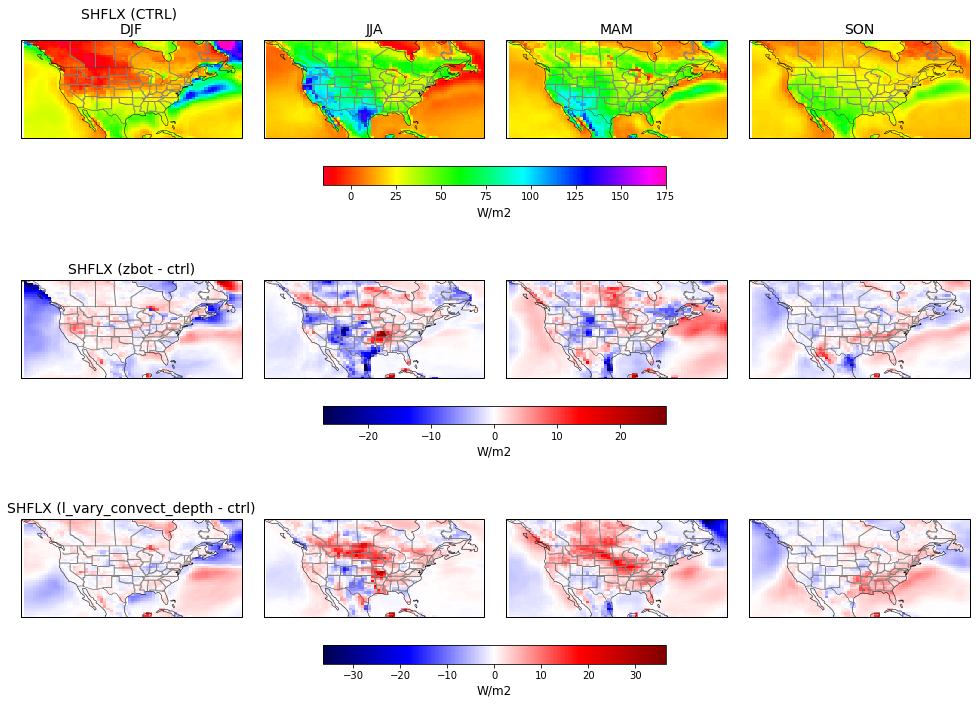

In [297]:
map2d_SeasonalDifferences(ctrlDSother_seasonal.isel(lon=ilon, lat=ilat), 
                          zbotDSother_seasonal.isel(lon=ilon, lat=ilat),
                          lvaryDSother_seasonal.isel(lon=ilon, lat=ilat), 
                         'SHFLX', 
                         '(zbot - ctrl)',
                         '(l_vary_convect_depth - ctrl)')



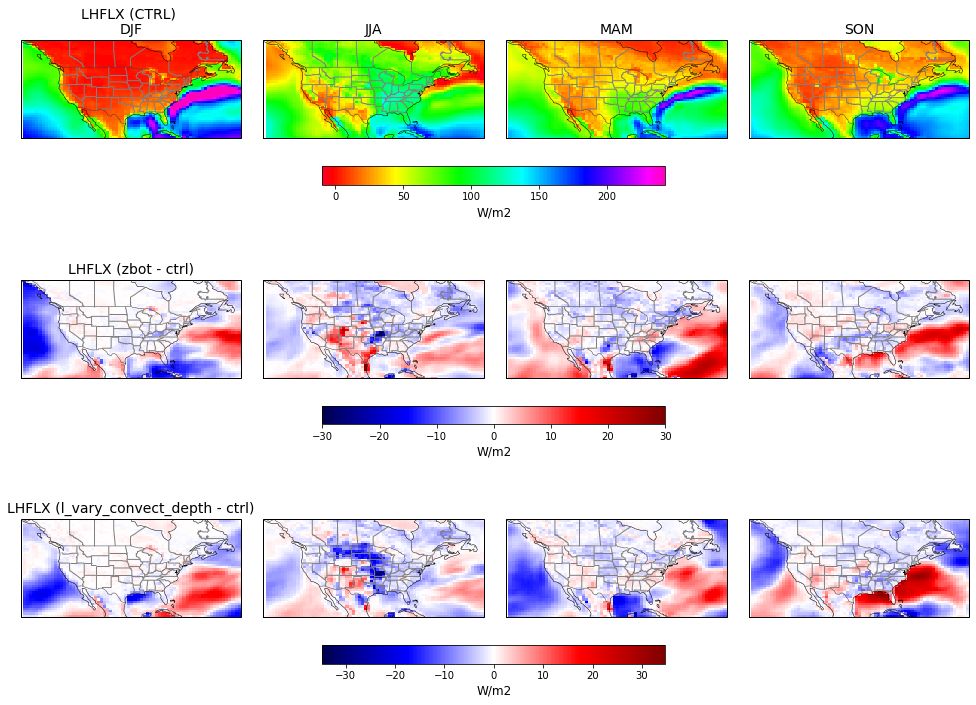

In [298]:
map2d_SeasonalDifferences(ctrlDSother_seasonal.isel(lon=ilon, lat=ilat), 
                          zbotDSother_seasonal.isel(lon=ilon, lat=ilat),
                          lvaryDSother_seasonal.isel(lon=ilon, lat=ilat), 
                         'LHFLX', 
                         '(zbot - ctrl)',
                         '(l_vary_convect_depth - ctrl)')


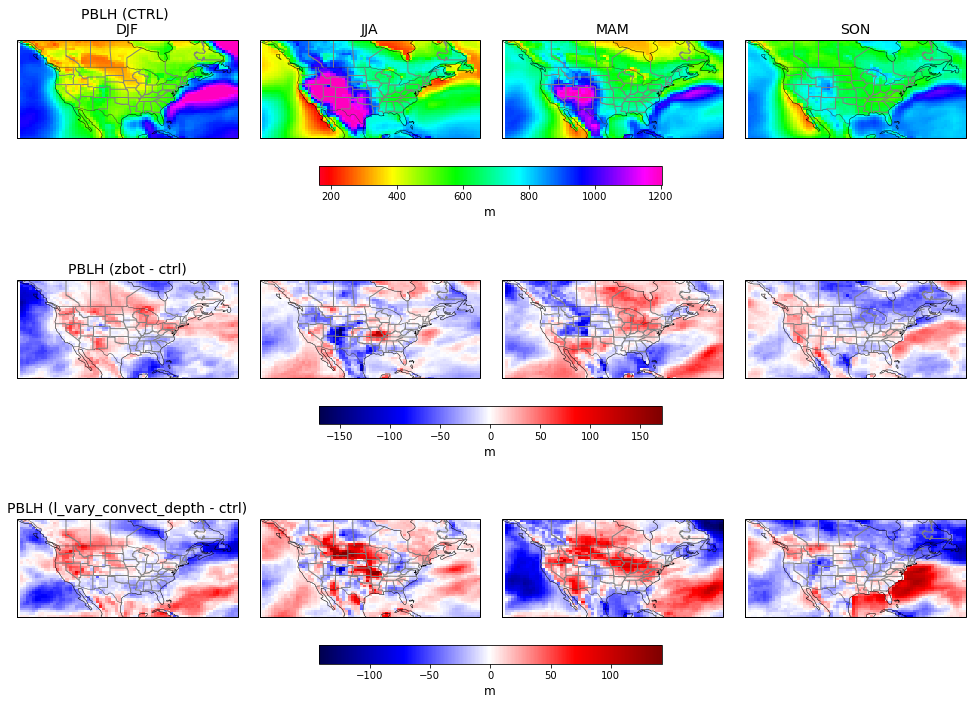

In [299]:
map2d_SeasonalDifferences(ctrlDSother_seasonal.isel(lon=ilon, lat=ilat), 
                          zbotDSother_seasonal.isel(lon=ilon, lat=ilat),
                          lvaryDSother_seasonal.isel(lon=ilon, lat=ilat), 
                         'PBLH', 
                         '(zbot - ctrl)',
                         '(l_vary_convect_depth - ctrl)')



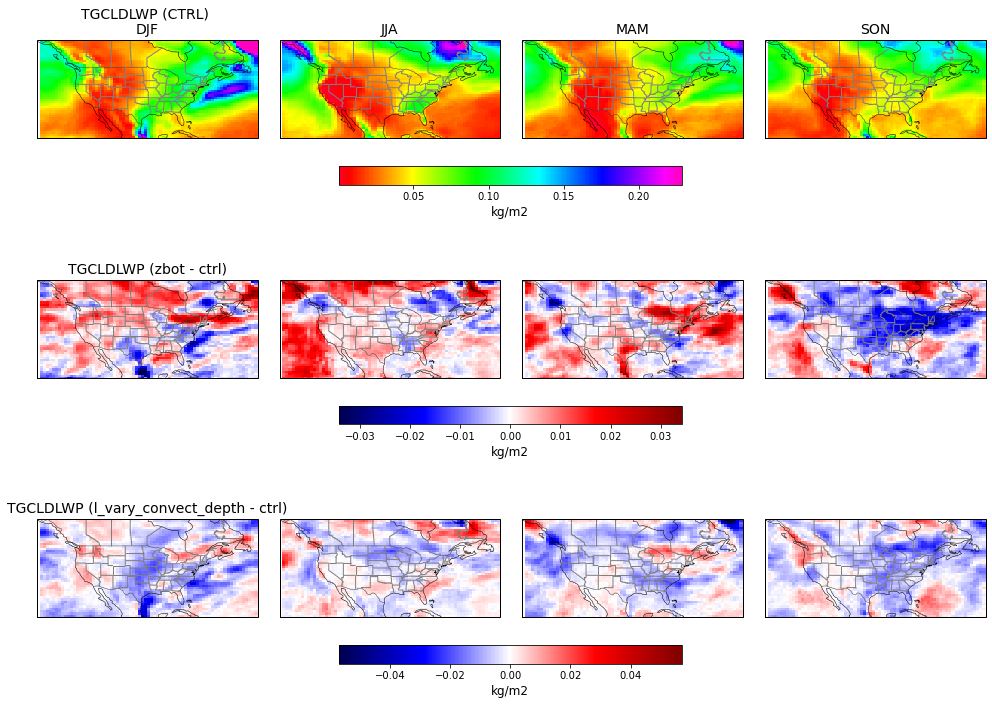

In [300]:
map2d_SeasonalDifferences(ctrlDSother_seasonal.isel(lon=ilon, lat=ilat), 
                          zbotDSother_seasonal.isel(lon=ilon, lat=ilat),
                          lvaryDSother_seasonal.isel(lon=ilon, lat=ilat), 
                         'TGCLDLWP', 
                         '(zbot - ctrl)',
                         '(l_vary_convect_depth - ctrl)')


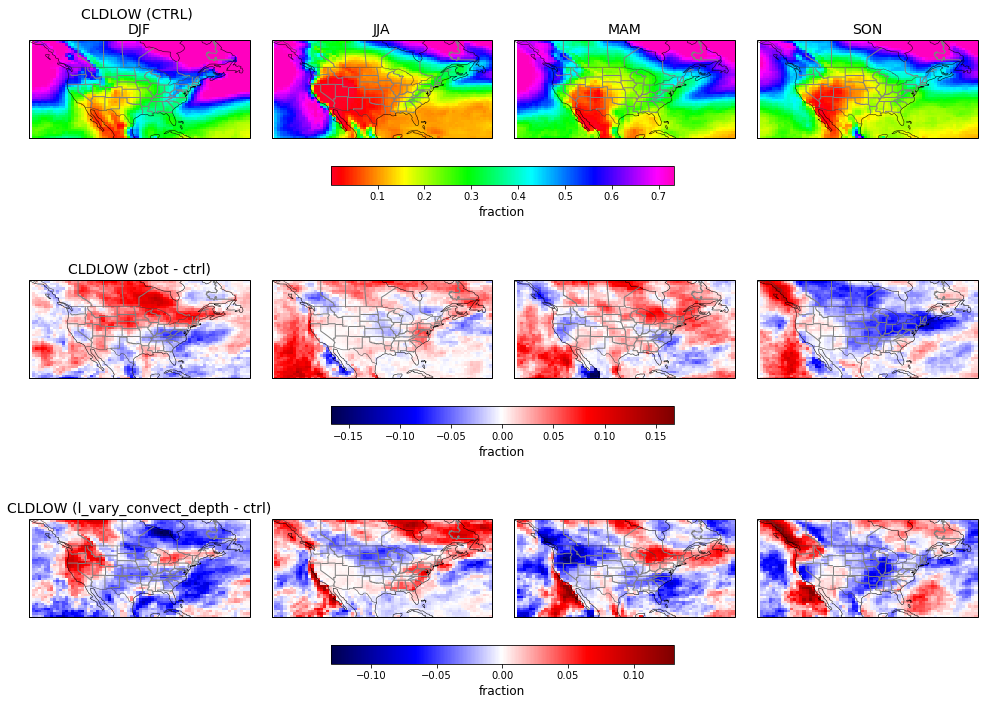

In [301]:
map2d_SeasonalDifferences(ctrlDSother_seasonal.isel(lon=ilon, lat=ilat), 
                          zbotDSother_seasonal.isel(lon=ilon, lat=ilat),
                          lvaryDSother_seasonal.isel(lon=ilon, lat=ilat), 
                         'CLDLOW', 
                         '(zbot - ctrl)',
                         '(l_vary_convect_depth - ctrl)')


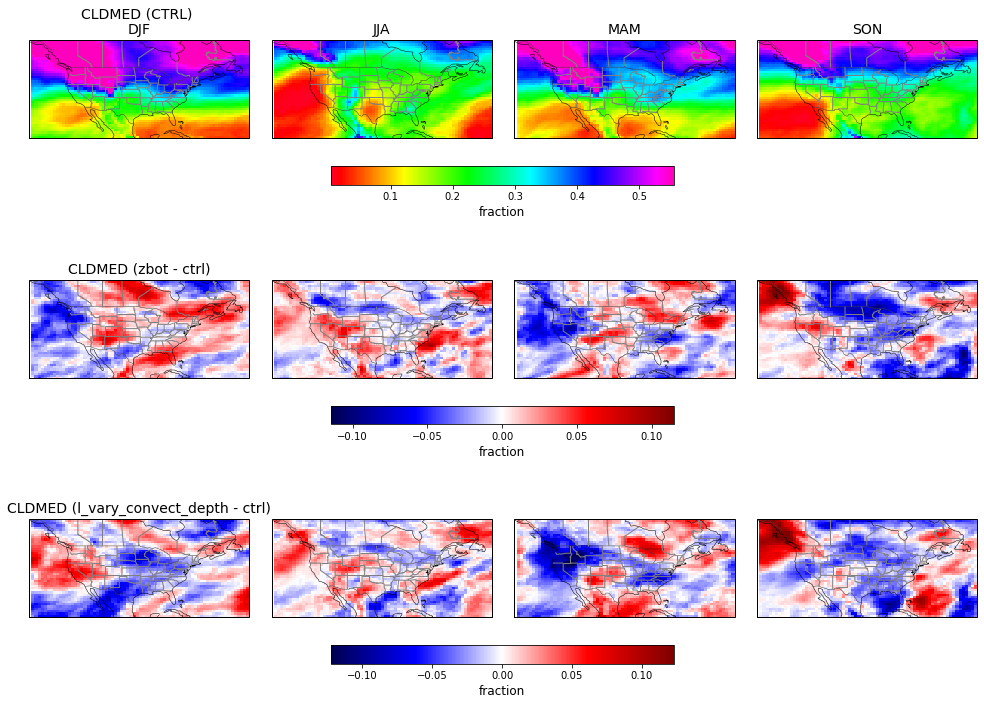

In [302]:
map2d_SeasonalDifferences(ctrlDSother_seasonal.isel(lon=ilon, lat=ilat), 
                          zbotDSother_seasonal.isel(lon=ilon, lat=ilat),
                          lvaryDSother_seasonal.isel(lon=ilon, lat=ilat), 
                         'CLDMED', 
                         '(zbot - ctrl)',
                         '(l_vary_convect_depth - ctrl)')


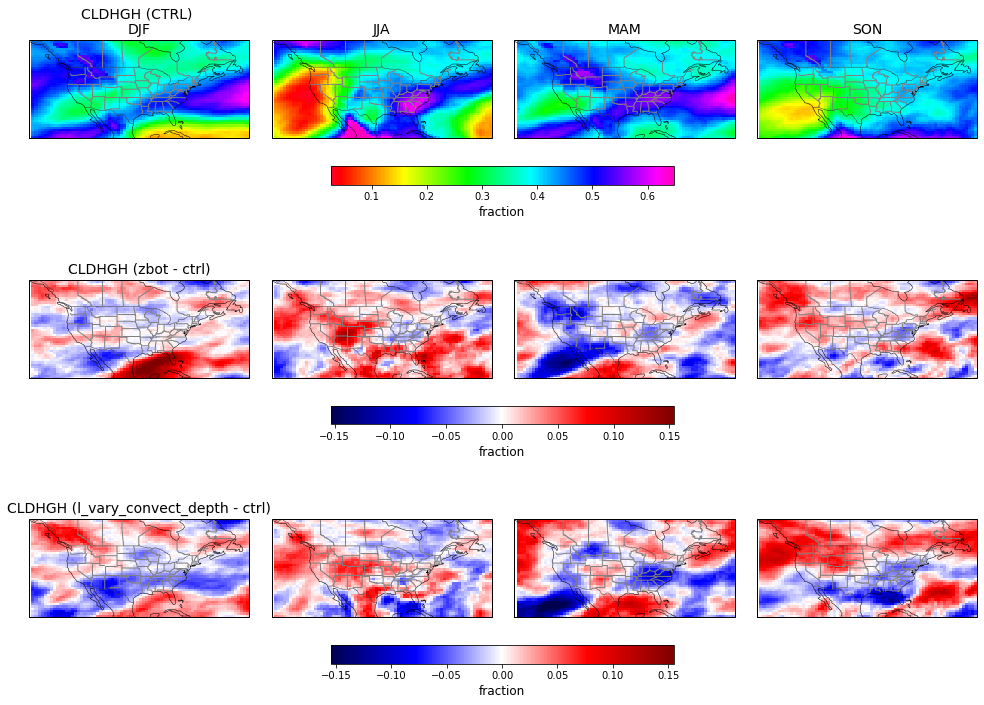

In [303]:
map2d_SeasonalDifferences(ctrlDSother_seasonal.isel(lon=ilon, lat=ilat), 
                          zbotDSother_seasonal.isel(lon=ilon, lat=ilat),
                          lvaryDSother_seasonal.isel(lon=ilon, lat=ilat), 
                         'CLDHGH', 
                         '(zbot - ctrl)',
                         '(l_vary_convect_depth - ctrl)')


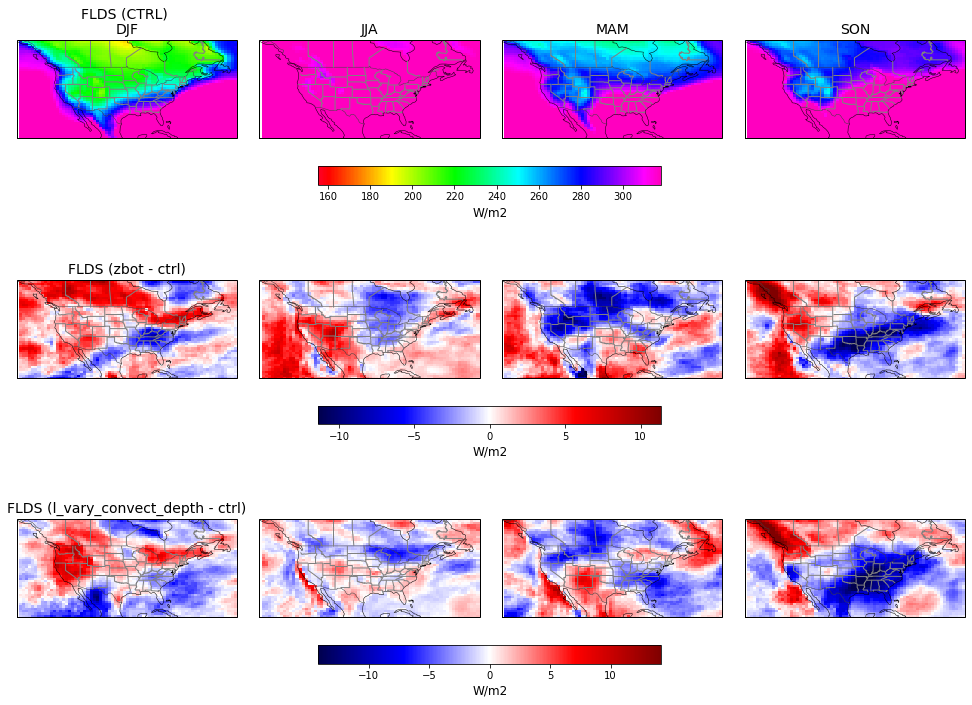

In [304]:
map2d_SeasonalDifferences(ctrlDSother_seasonal.isel(lon=ilon, lat=ilat), 
                          zbotDSother_seasonal.isel(lon=ilon, lat=ilat),
                          lvaryDSother_seasonal.isel(lon=ilon, lat=ilat), 
                         'FLDS', 
                         '(zbot - ctrl)',
                         '(l_vary_convect_depth - ctrl)')


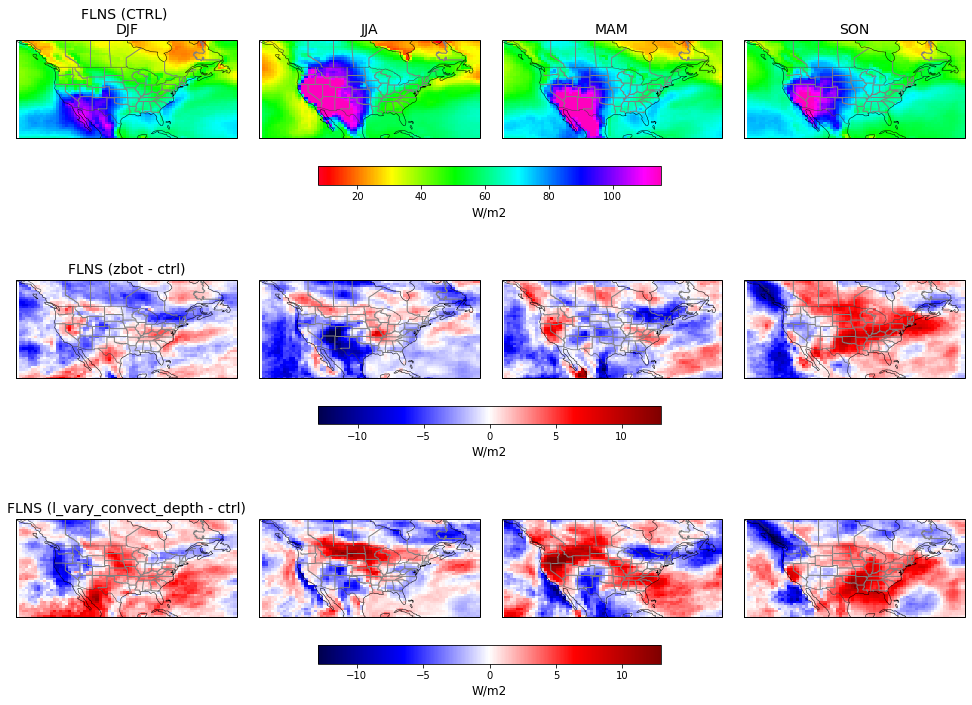

In [305]:
map2d_SeasonalDifferences(ctrlDSother_seasonal.isel(lon=ilon, lat=ilat), 
                          zbotDSother_seasonal.isel(lon=ilon, lat=ilat),
                          lvaryDSother_seasonal.isel(lon=ilon, lat=ilat), 
                         'FLNS', 
                         '(zbot - ctrl)',
                         '(l_vary_convect_depth - ctrl)')

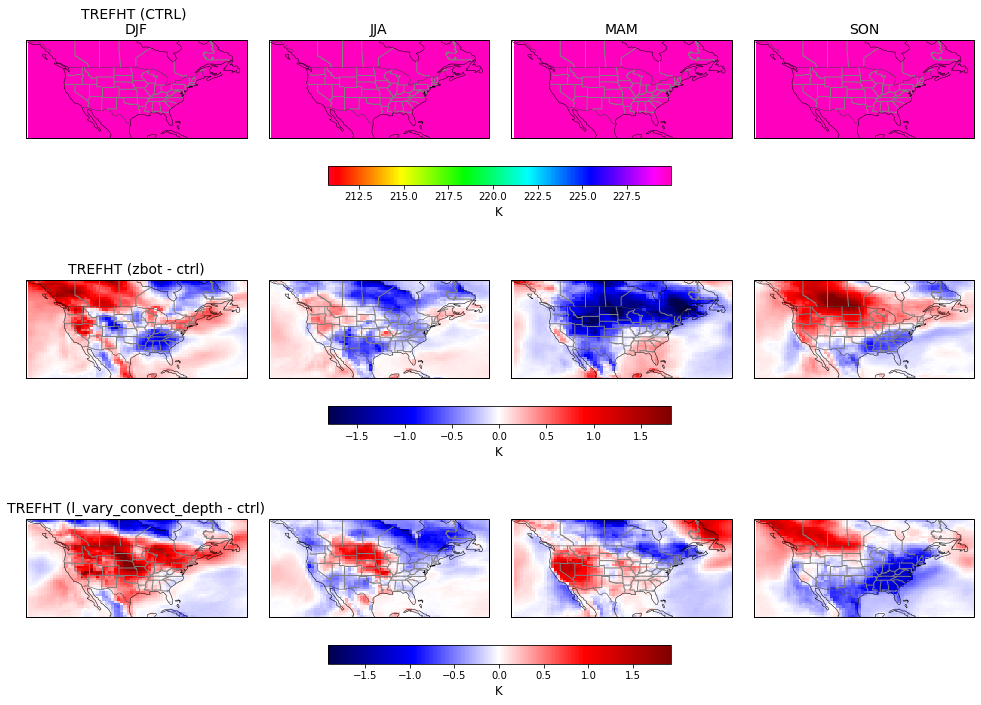

In [306]:
map2d_SeasonalDifferences(ctrlDSother_seasonal.isel(lon=ilon, lat=ilat), 
                          zbotDSother_seasonal.isel(lon=ilon, lat=ilat),
                          lvaryDSother_seasonal.isel(lon=ilon, lat=ilat), 
                         'TREFHT', 
                         '(zbot - ctrl)',
                         '(l_vary_convect_depth - ctrl)')

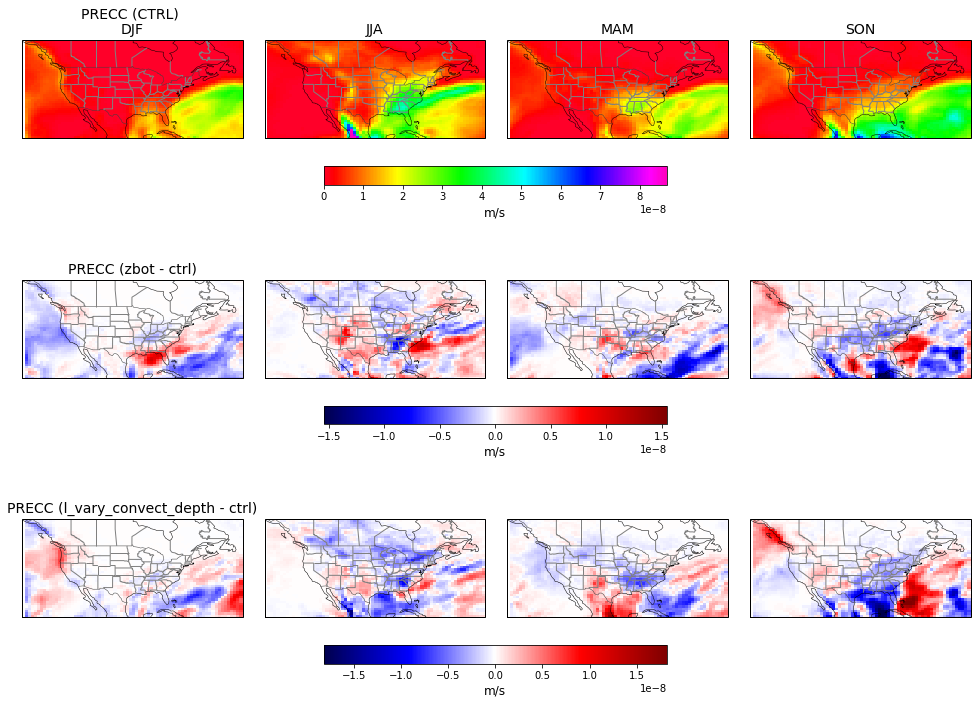

In [307]:
map2d_SeasonalDifferences(ctrlDSother_seasonal.isel(lon=ilon, lat=ilat), 
                          zbotDSother_seasonal.isel(lon=ilon, lat=ilat),
                          lvaryDSother_seasonal.isel(lon=ilon, lat=ilat), 
                         'PRECC', 
                         '(zbot - ctrl)',
                         '(l_vary_convect_depth - ctrl)')

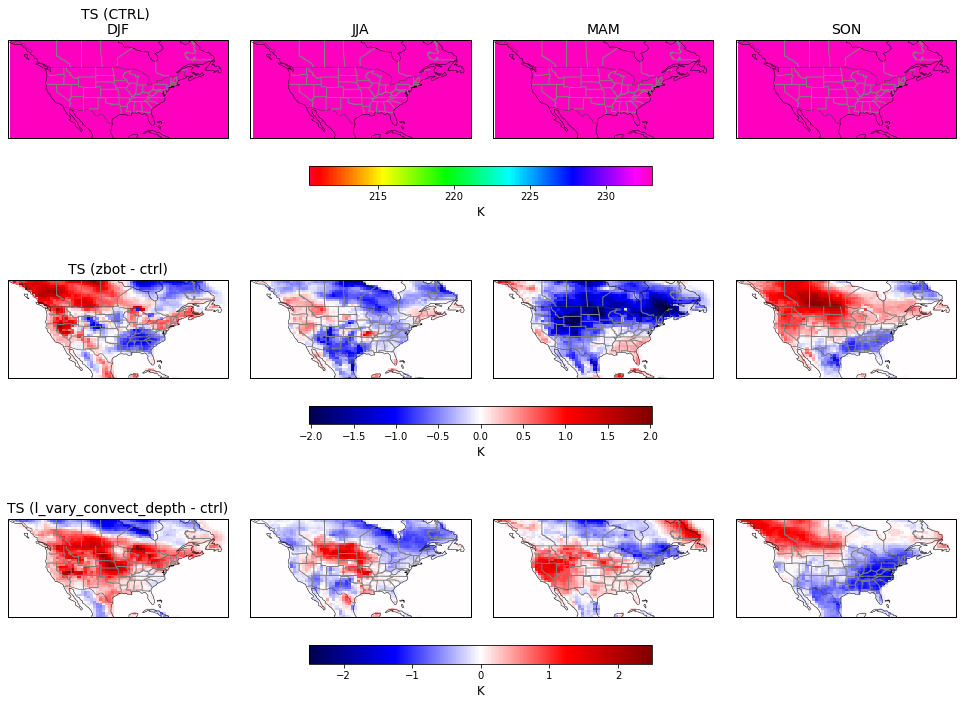

In [333]:
map2d_SeasonalDifferences(ctrlDSother_seasonal.isel(lon=ilon, lat=ilat), 
                          zbotDSother_seasonal.isel(lon=ilon, lat=ilat),
                          lvaryDSother_seasonal.isel(lon=ilon, lat=ilat), 
                         'TS', 
                         '(zbot - ctrl)',
                         '(l_vary_convect_depth - ctrl)')

In [309]:
## Also take a look at TBOT and (TBOT-TS)
ctrlDSother_seasonal['TBOT']   = ctrlDSother_seasonal['T'].isel(lev=-1)
zbotDSother_seasonal['TBOT']   = zbotDSother_seasonal['T'].isel(lev=-1)
lvaryDSother_seasonal['TBOT']  = lvaryDSother_seasonal['T'].isel(lev=-1)

ctrlDSother_seasonal['TBOT-TS']  = ctrlDSother_seasonal['TBOT'] - ctrlDSother_seasonal['TS']
zbotDSother_seasonal['TBOT-TS']  = zbotDSother_seasonal['TBOT'] - zbotDSother_seasonal['TS']
lvaryDSother_seasonal['TBOT-TS'] = lvaryDSother_seasonal['TBOT'] - lvaryDSother_seasonal['TS']

# For labeling purposes, also put into ctrlDS_other
ctrlDS_other['TBOT'] = ctrlDSother_seasonal['T'].isel(lev=-1)
ctrlDS_other['TBOT-TS']  = ctrlDS_other['TBOT'] - ctrlDS_other['TS']
ctrlDS_other['TBOT'].attrs['units'] = 'K'
ctrlDS_other['TBOT-TS'].attrs['units'] = 'K'

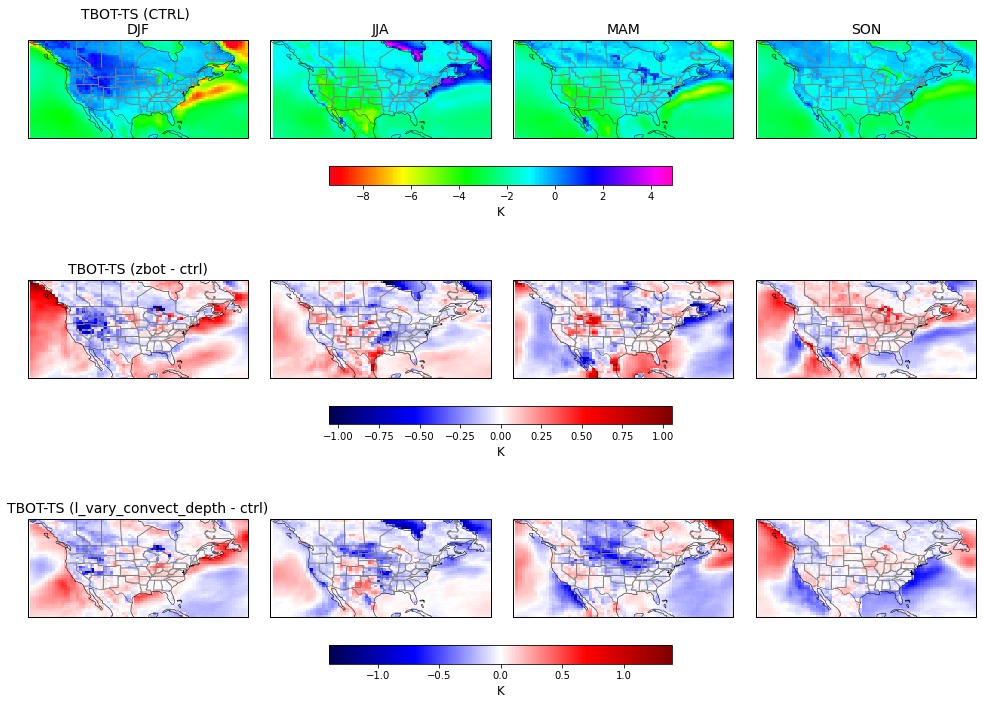

In [310]:
map2d_SeasonalDifferences(ctrlDSother_seasonal.isel(lon=ilon, lat=ilat), 
                          zbotDSother_seasonal.isel(lon=ilon, lat=ilat),
                          lvaryDSother_seasonal.isel(lon=ilon, lat=ilat), 
                         'TBOT-TS', 
                         '(zbot - ctrl)',
                         '(l_vary_convect_depth - ctrl)')



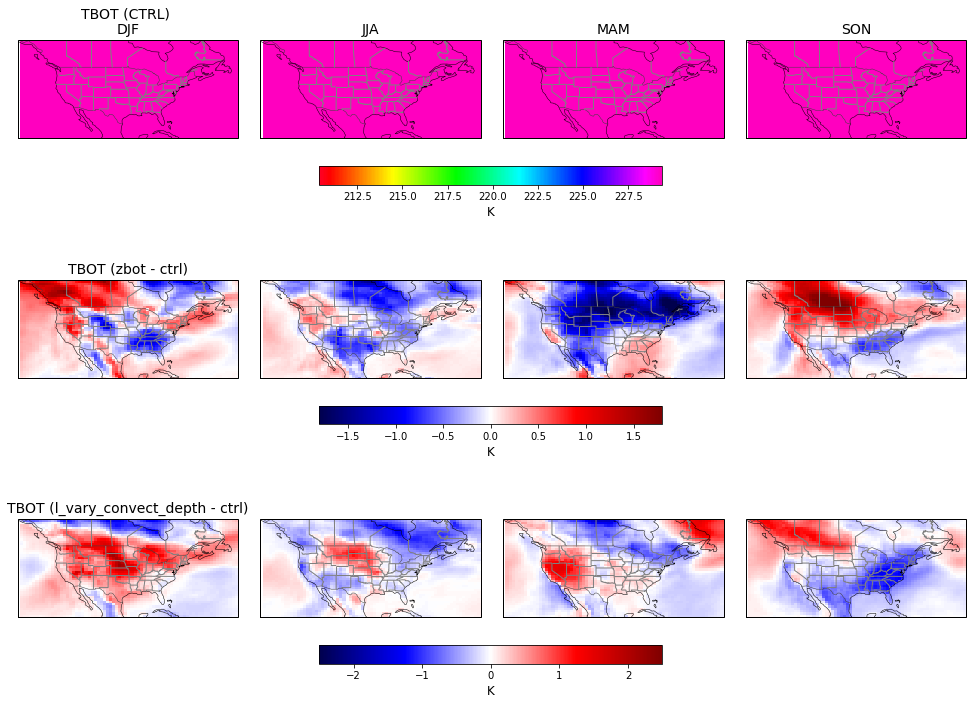

In [334]:
map2d_SeasonalDifferences(ctrlDSother_seasonal.isel(lon=ilon, lat=ilat), 
                        zbotDSother_seasonal.isel(lon=ilon, lat=ilat),
                        lvaryDSother_seasonal.isel(lon=ilon, lat=ilat), 
                        'TBOT', 
                        '(zbot - ctrl)',
                        '(l_vary_convect_depth - ctrl)')



### CLUBB Variables

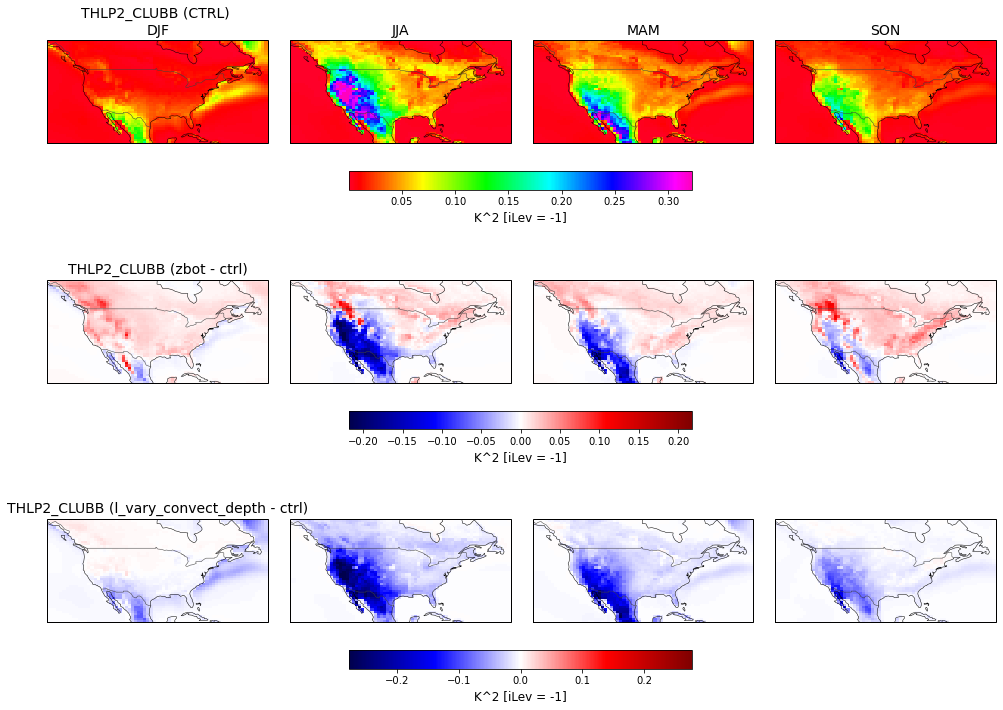

In [337]:
map_SeasonalDifferences(ctrlDS_seasonal.isel(lon=ilon, lat=ilat), 
                        zbotDS_seasonal.isel(lon=ilon, lat=ilat),
                        lvaryDS_seasonal.isel(lon=ilon, lat=ilat), 
                        'THLP2_CLUBB', -1, 
                        '(zbot - ctrl)',
                        '(l_vary_convect_depth - ctrl)')


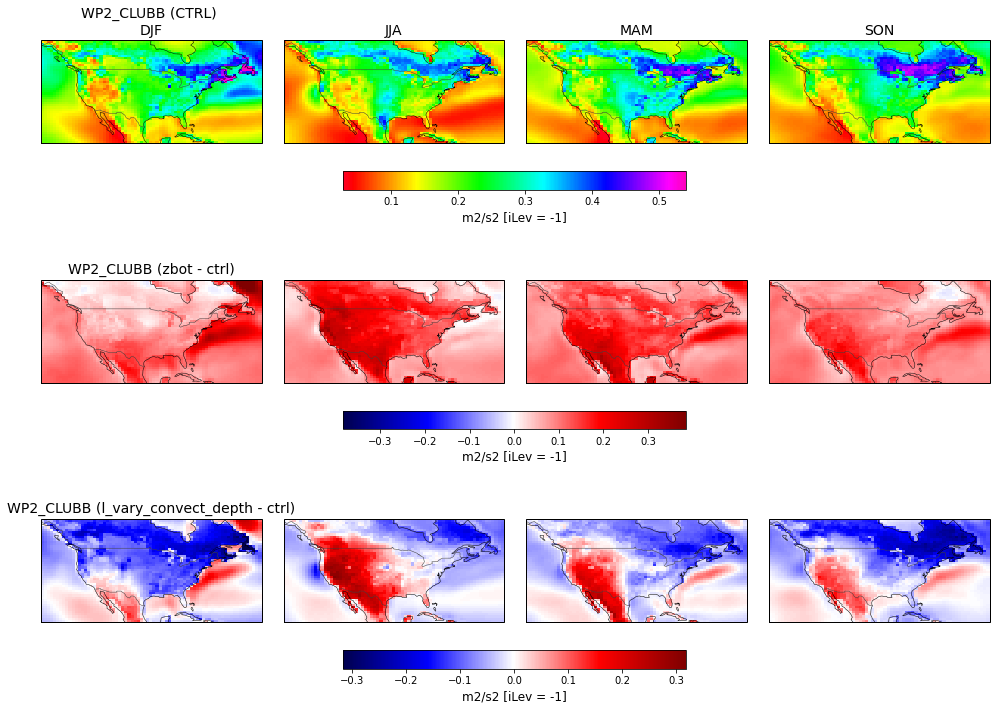

In [320]:
map_SeasonalDifferences(ctrlDS_seasonal.isel(lon=ilon, lat=ilat), 
                        zbotDS_seasonal.isel(lon=ilon, lat=ilat),
                        lvaryDS_seasonal.isel(lon=ilon, lat=ilat), 
                        'WP2_CLUBB', -1, 
                        '(zbot - ctrl)',
                        '(l_vary_convect_depth - ctrl)')

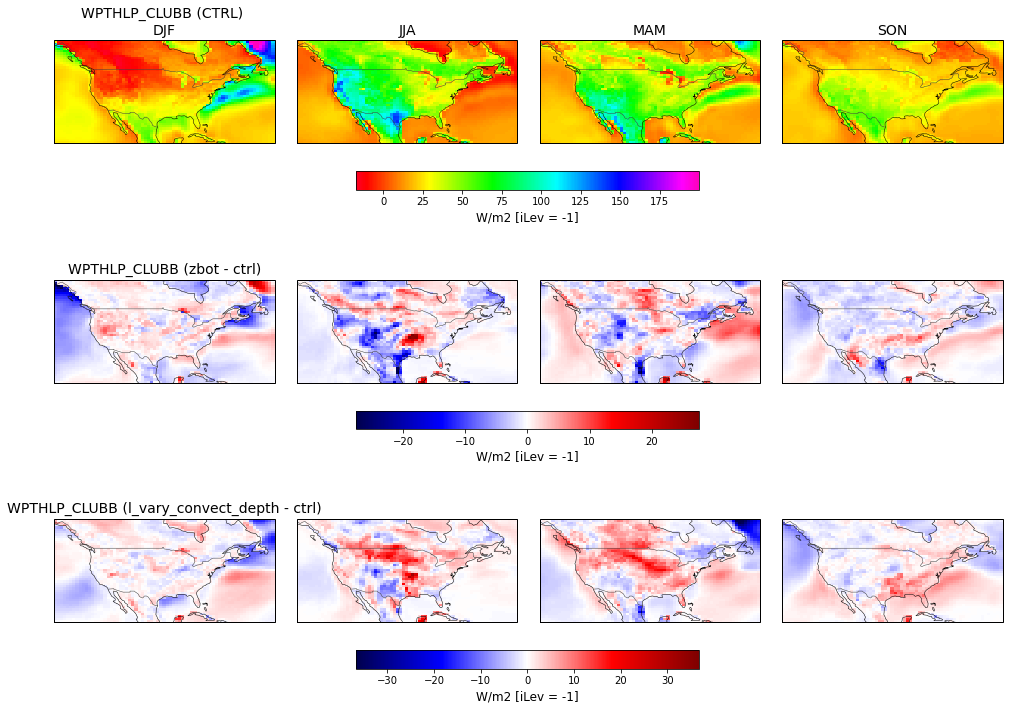

In [321]:
map_SeasonalDifferences(ctrlDS_seasonal.isel(lon=ilon, lat=ilat), 
                        zbotDS_seasonal.isel(lon=ilon, lat=ilat),
                        lvaryDS_seasonal.isel(lon=ilon, lat=ilat), 
                        'WPTHLP_CLUBB', -1, 
                        '(zbot - ctrl)',
                        '(l_vary_convect_depth - ctrl)')

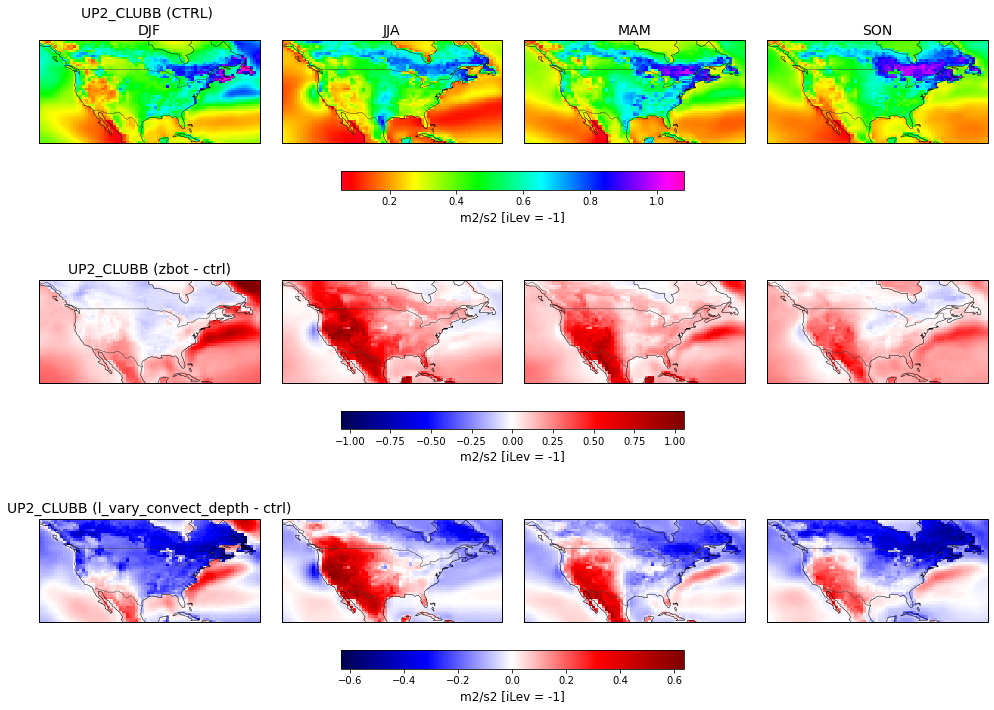

In [322]:
map_SeasonalDifferences(ctrlDS_seasonal.isel(lon=ilon, lat=ilat), 
                        zbotDS_seasonal.isel(lon=ilon, lat=ilat),
                        lvaryDS_seasonal.isel(lon=ilon, lat=ilat), 
                        'UP2_CLUBB', -1, 
                        '(zbot - ctrl)',
                        '(l_vary_convect_depth - ctrl)')

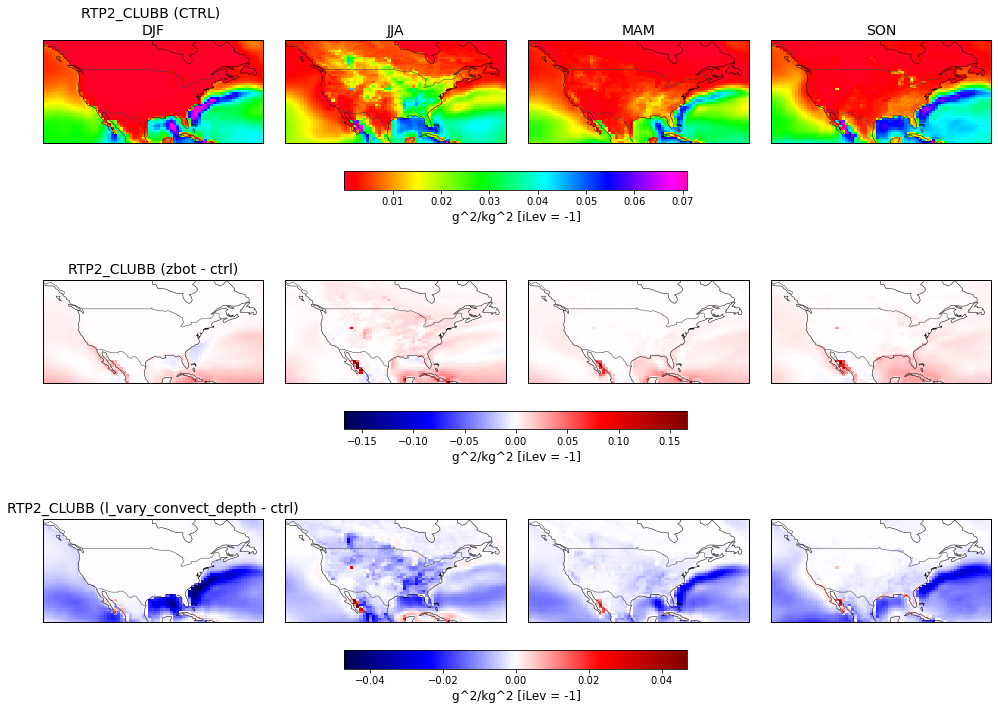

In [323]:
map_SeasonalDifferences(ctrlDS_seasonal.isel(lon=ilon, lat=ilat), 
                        zbotDS_seasonal.isel(lon=ilon, lat=ilat),
                        lvaryDS_seasonal.isel(lon=ilon, lat=ilat), 
                        'RTP2_CLUBB', -1, 
                        '(zbot - ctrl)',
                        '(l_vary_convect_depth - ctrl)')

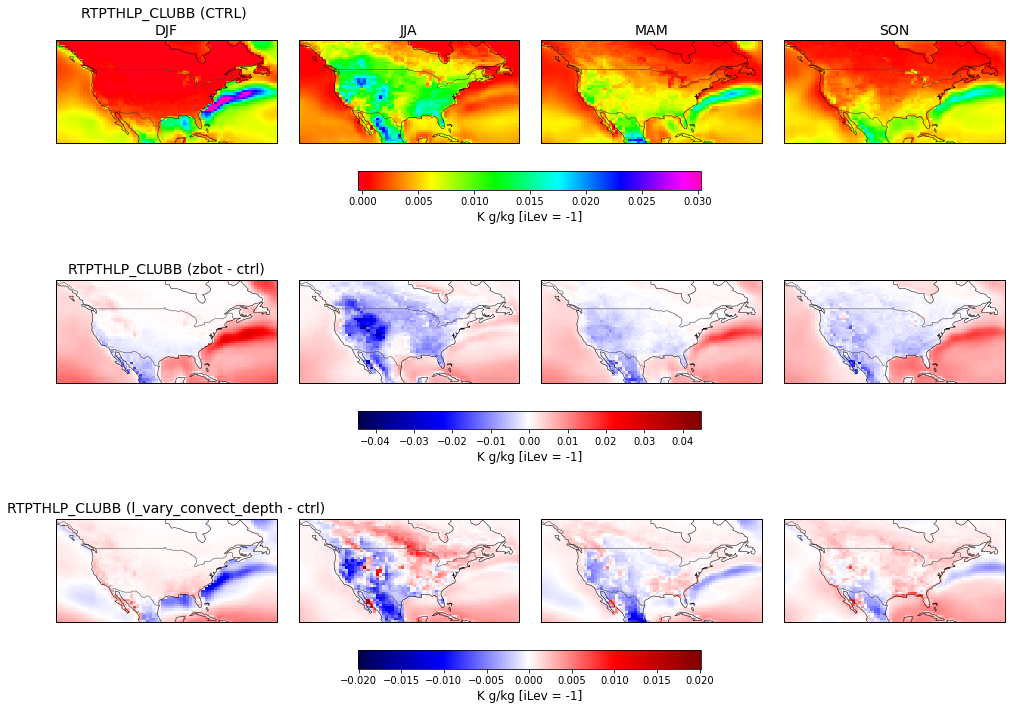

In [324]:
map_SeasonalDifferences(ctrlDS_seasonal.isel(lon=ilon, lat=ilat), 
                        zbotDS_seasonal.isel(lon=ilon, lat=ilat),
                        lvaryDS_seasonal.isel(lon=ilon, lat=ilat), 
                        'RTPTHLP_CLUBB', -1, 
                        '(zbot - ctrl)',
                        '(l_vary_convect_depth - ctrl)')

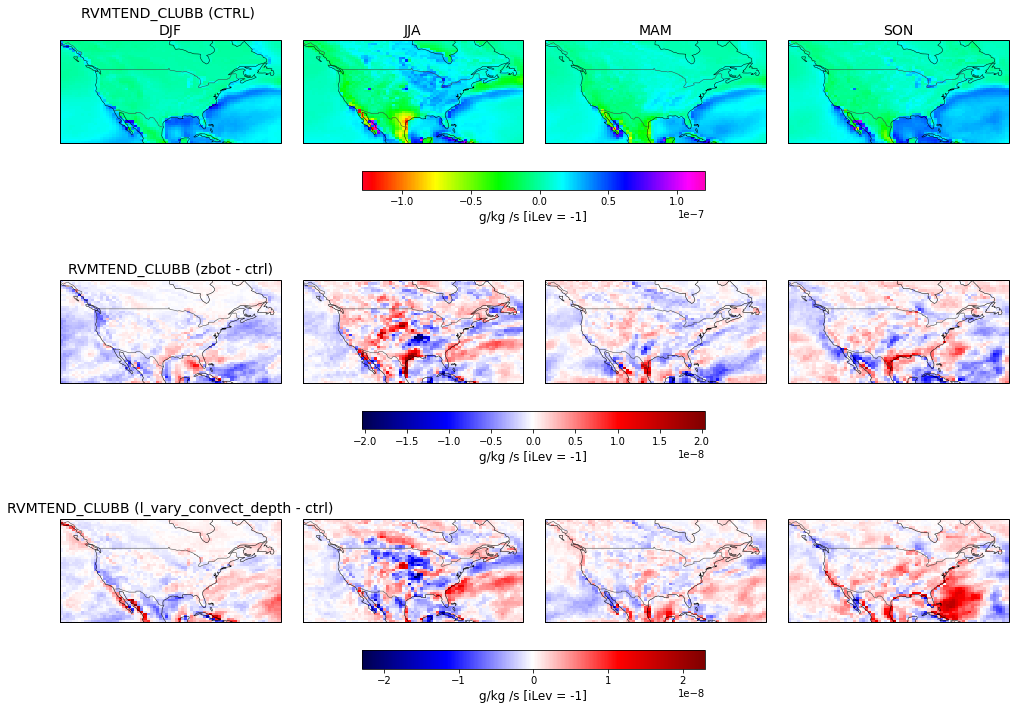

In [325]:
map_SeasonalDifferences(ctrlDS_seasonal.isel(lon=ilon, lat=ilat), 
                        zbotDS_seasonal.isel(lon=ilon, lat=ilat),
                        lvaryDS_seasonal.isel(lon=ilon, lat=ilat), 
                        'RVMTEND_CLUBB', -1, 
                        '(zbot - ctrl)',
                        '(l_vary_convect_depth - ctrl)')

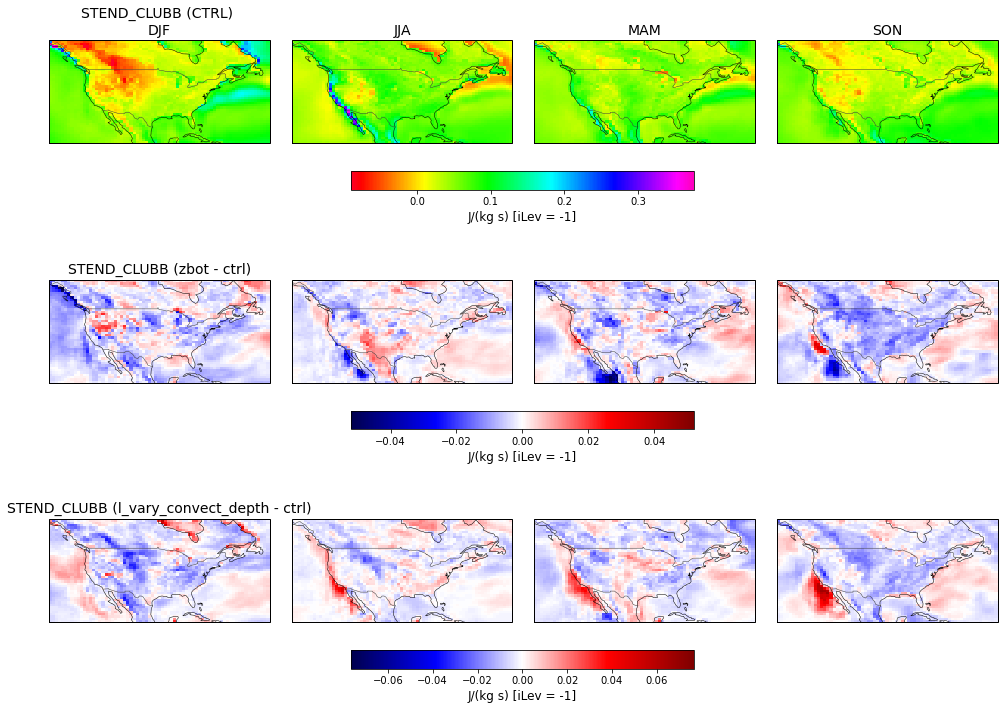

In [326]:
map_SeasonalDifferences(ctrlDS_seasonal.isel(lon=ilon, lat=ilat), 
                        zbotDS_seasonal.isel(lon=ilon, lat=ilat),
                        lvaryDS_seasonal.isel(lon=ilon, lat=ilat), 
                        'STEND_CLUBB', -1, 
                        '(zbot - ctrl)',
                        '(l_vary_convect_depth - ctrl)')


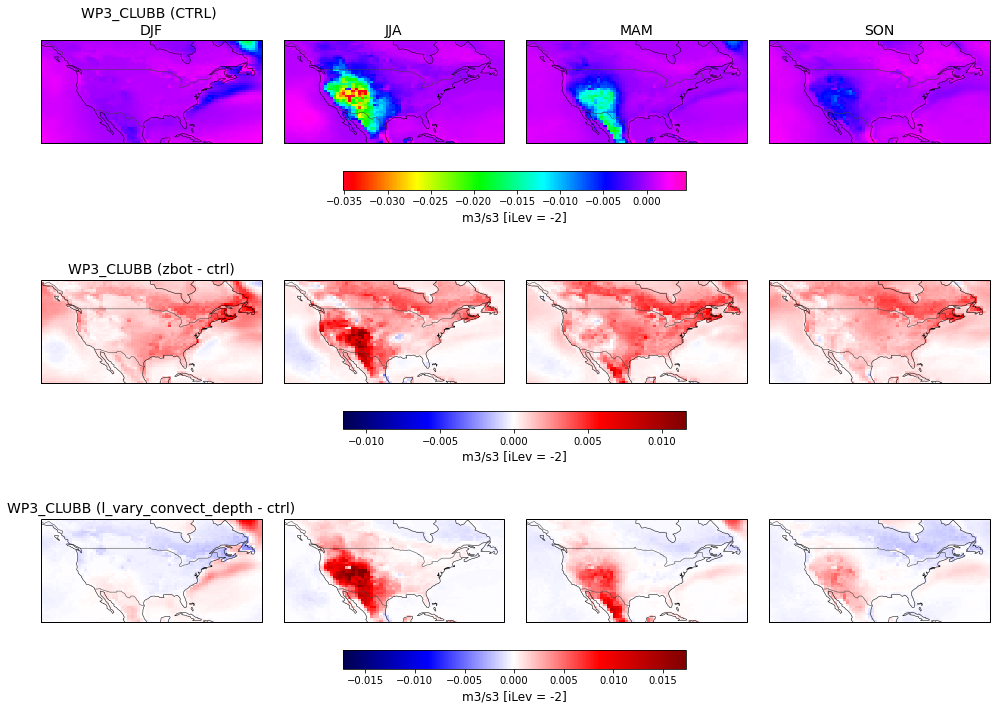

In [328]:
map_SeasonalDifferences(ctrlDS_seasonal.isel(lon=ilon, lat=ilat), 
                        zbotDS_seasonal.isel(lon=ilon, lat=ilat),
                        lvaryDS_seasonal.isel(lon=ilon, lat=ilat), 
                        'WP3_CLUBB', -2, 
                        '(zbot - ctrl)',
                        '(l_vary_convect_depth - ctrl)')

